Imports

In [1]:
# Data Loading
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.keras as keras

In [2]:
# Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from sklearn.model_selection import train_test_split

In [3]:
# Evaluation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Data Loading

In [4]:
# Load data
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

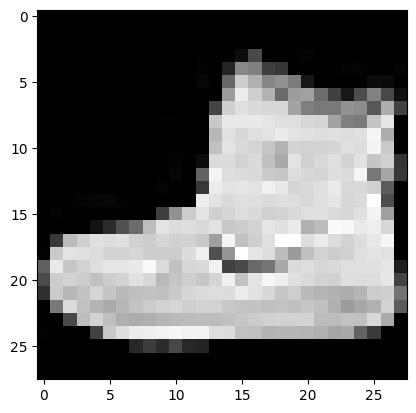

Label: 9


In [5]:
image = train_images[0]
plt.imshow(image, cmap = 'gray')
plt.show()
print('Label:',train_labels[0])

Preprocessing

In [6]:
# Reshape & rescale
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)
train_images = train_images/255
test_images = test_images/255

In [7]:
num_categories = 10
train_labels = keras.utils.to_categorical(train_labels, num_categories)
test_labels= keras.utils.to_categorical(test_labels, num_categories)

Build model

In [8]:
# Convolution Layer
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [9]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [10]:
# Compile
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
# Split validation data
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

In [12]:
# Train model
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_weight_fashio_mnist.h5', verbose=0, mode='auto',
                                              monitor='val_accuracy',  
                                              save_best_only=True)
batch_size = 16
epochs = 20
history = model.fit(train_images, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_images,val_labels),
                    callbacks=[checkpoint], verbose=1)
print("Done!")

Epoch 1/20
3000/3000 [==============================] - 120s 40ms/step - loss: 1.2253 - accuracy: 0.5433 - val_loss: 0.5847 - val_accuracy: 0.8039
Epoch 2/20
3000/3000 [==============================] - 114s 38ms/step - loss: 0.8043 - accuracy: 0.7027 - val_loss: 0.4841 - val_accuracy: 0.8351
Epoch 3/20
3000/3000 [==============================] - 112s 37ms/step - loss: 0.6882 - accuracy: 0.7509 - val_loss: 0.4461 - val_accuracy: 0.8593
Epoch 4/20
3000/3000 [==============================] - 123s 41ms/step - loss: 0.6225 - accuracy: 0.7790 - val_loss: 0.3982 - val_accuracy: 0.8711
Epoch 5/20
3000/3000 [==============================] - 123s 41ms/step - loss: 0.5715 - accuracy: 0.7980 - val_loss: 0.3872 - val_accuracy: 0.8763
Epoch 6/20
3000/3000 [==============================] - 109s 36ms/step - loss: 0.5388 - accuracy: 0.8115 - val_loss: 0.3632 - val_accuracy: 0.8867
Epoch 7/20
3000/3000 [==============================] - 112s 37ms/step - loss: 0.5159 - accuracy: 0.8219 - val_loss: 0

Evaluation

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


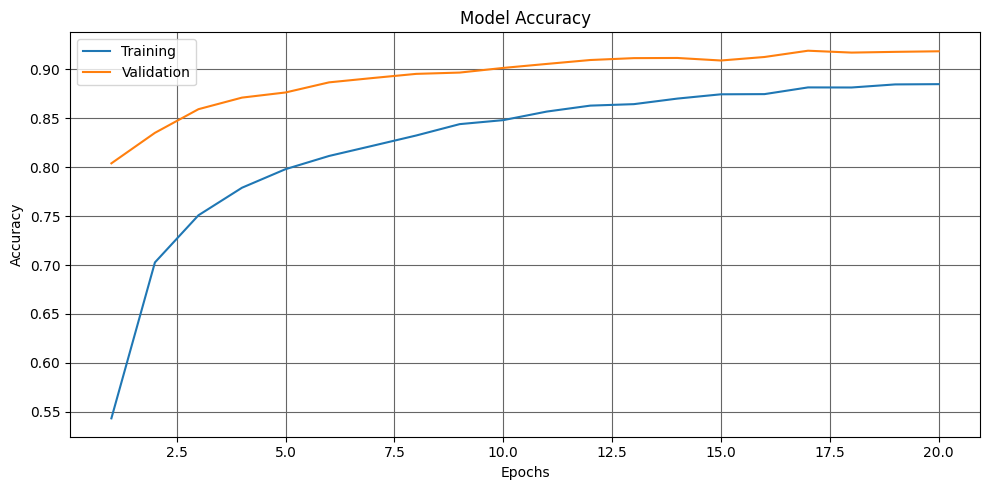

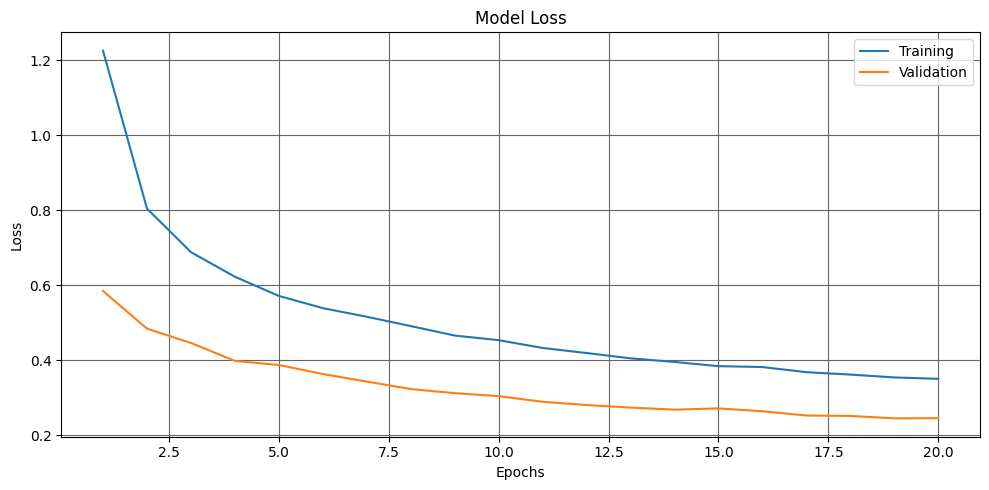

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(history.epoch) + 1)


plt.figure(figsize=(10,5))

plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))

plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

In [15]:
# Predict test data
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
y_hat = np.argmax(y_pred,axis = 1) 

313/313 [==============================] - 6s 19ms/step


              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1000
           1       1.00      0.98      0.99      1000
           2       0.93      0.85      0.89      1000
           3       0.91      0.91      0.91      1000
           4       0.86      0.88      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.66      0.82      0.73      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

Confusion matrix, without normalization
[[767   0   6  22   1   1 199   0   4   0]
 [  0 976   0  21   1   0   1   0   1   0]
 [ 10   1 847   5  47   0  90   0   0   0]
 [ 10   1   7 905  33   0  44   0   0   0]
 [  0   0  22  18 877   0  81

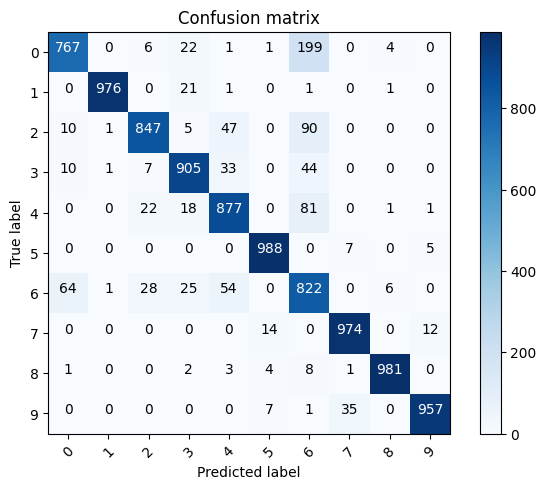

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   
    
# Compute confusion matrix
rounded_labels=np.argmax(test_labels, axis=1)
cnf_matrix = confusion_matrix(rounded_labels, y_hat, labels=[0,1,2,3,4,5,6,7,8,9])
np.set_printoptions(precision=2)

print (classification_report(rounded_labels, y_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2','3','4','5','6','7','8','9'],
                      normalize= False,  title='Confusion matrix')

In [17]:
# Compute accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(rounded_labels, y_hat)
print('Accuracy: %f' % accuracy)
# Compute precision tp / (tp + fp)
precision = precision_score(rounded_labels, y_hat, average='macro')
print('Precision: %f' % precision)
# Compute recall: tp / (tp + fn)
recall = recall_score(rounded_labels, y_hat, average='macro')
print('Recall: %f' % recall)
# Compute f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(rounded_labels, y_hat, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.909400
Precision: 0.915918
Recall: 0.909400
F1 score: 0.910996


In [18]:
# Save model
model.save('./model_Fashion_Mnist.h5', overwrite=True)
print("Done!!")

Done!!
